<center><font size=6> News Article Categorization </font></center>

## **Problem Statement**

### **Business Context**

In the dynamic landscape of the media and news industry, the ability to swiftly categorize and curate content has become a strategic imperative. The vast volume of information demands efficient systems to organize and present content to the audience.

The media industry, being the pulse of information dissemination, grapples with the continuous influx of news articles spanning diverse topics. Ensuring that the right articles reach the right audience promptly is not just a logistical necessity but a critical component in retaining and engaging audiences in an age of information overload.

Common Industry Challenges:
Amidst the ceaseless flow of news, organizations encounter challenges such as:
- Information Overload: The sheer volume of news articles makes manual categorization impractical.
- Timeliness: Delays in categorizing news articles can result in outdated or misplaced content.

### **Problem Definition**

E-news Express, a news aggregation startup, faces the challenge of categorizing the news articles collected. With news articles covering sports, business, politics, and more, the need for an advanced and automated system to categorize them has become increasingly evident. The manual efforts required for categorizing such a diverse range of news articles are substantial, and human errors in the categorization of news articles can lead to reputational damage for the startup. There is also the factor of delays and potential inaccuracies. To streamline and optimize this process, the organization recognizes the imperative of adopting cutting-edge technologies, particularly machine learning, to automate and enhance the categorization of content.

As a data scientist on the E-news Express data team, the task is to analyze the text in news articles and build a model for categorizing them. The goal is to optimize the categorization process, ensuring timely and personalized delivery.

### **Data Dictionary**

- **Article**: The main body of the news article
- **Category**: The category the article belongs to

## **Please read the instructions carefully before starting the project.**

**Note**:
1. Please make sure to use Google Colab for this project.
2. It is recommended to use Colab's free GPU for this project.
    - One can set the Colab runtime to ***T4 GPU*** before starting the project to use the GPU.

## **Installing and Importing Necessary Libraries and Dependencies**

In [1]:
import os
os.environ['PATH'] += ':/root/.local/bin'

In [ ]:
# !pip uninstall -y pandas torch torchaudio torchtext torchvision

In [2]:
# Installing the libraries with the specified version.
# !pip install pandas==2.0.3 torch==2.3.1 torchaudio==2.3.1 torchtext==0.18.0 torchvision==0.18.1 tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 sentence-transformers==2.5.1 transformers==4.38.2 bitsandbytes==0.43.0 accelerate==0.27.2 sentencepiece==0.2.0 -q --user
!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 torch==2.3.1 sentence-transformers==2.5.1 transformers==4.38.2 bitsandbytes==0.43.0 accelerate==0.27.2 sentencepiece==0.2.0 -q --user

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.7/130.7 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 98.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.5/156.5 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 115.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.2/102.2 MB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.0/280.0 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 59.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 84.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 83.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-cola

In [ ]:
#!pip install -U sentence-transformers

**NOTE**: If you encounter an error stating 'library not found,' please restart the kernel (do not disconnect the runtime) and try again.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('max_colwidth', None)

import torch
from sentence_transformers import SentenceTransformer
from transformers import T5Tokenizer, T5ForConditionalGeneration, pipeline
# To build a Random Forest model
from sklearn.ensemble import RandomForestClassifier

# to split the data
from sklearn.model_selection import train_test_split
# to compute performance metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,make_scorer,recall_score,precision_score,f1_score
from sklearn.model_selection import GridSearchCV

# to ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

## **Loading the Dataset**

In [2]:
# let colab access my google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Code to read the CSV file
data = pd.read_csv("/content/drive/MyDrive/GL/article_data.csv")

## **Data Overview**

In [4]:
# Code to check the first 5 rows of the data
data.head()

,Article,Category
0,"Sudan Govt rejects call to separate religion, state Sudanese rebel leaders #39; demand that Islam be kept out of government in the war-torn region of Darfur, has been rejected by government negotiators.",0
1,Hassan: #39;Abhorrent act #39; says Blair Western political leaders have united to condemn the kidnappers of charity worker Margaret Hassan after a video surfaced apparently showing a militant firing a pistol into the head of a blindfolded woman wearing an orange jumpsuit.,0
2,"Sharon Says Gaza Evacuation Set for 2005 (AP) AP - Israel's evacuation of the Gaza Strip will begin next summer and will take about 12 weeks, Prime Minister Ariel Sharon said Wednesday, reversing an earlier decision to speed up the pullout.",0
3,"Prince Charles chastised for quot;old fashioned quot; views A minister has launched a scathing attack on heir to the throne Prince Charles, accusing him of being quot;very old fashioned quot; and out of touch in his views on teaching in schools.",0
4,"U.S. Says N.Korea Blast Probably Not Nuclear SEOUL (Reuters) - A huge explosion rocked North Korea last week but U.S. and South Korean officials said on Sunday it was unlikely to have been a nuclear weapons test despite the appearance of a ""peculiar cloud"" over the area.",0


In [5]:
# Code to check the shape of the data
data.shape

(4000, 2)

Observation: Data contains 4000 rows and 2 columns

In [6]:
data.isnull().sum()

Article     0
Category    0
dtype: int64

In [7]:
# Let's check if any duplicate orders in data
data.duplicated().sum()

0

In [8]:
## Code to check the value counts in Category column
data["Category"].value_counts()

0    1000
1    1000
2    1000
3    1000
Name: Category, dtype: int64

Observations:
- Dataset contains 4000 rows and 2 columns. It includes Article content and type of category of article.
- There are 4 different types content in this dataset.
- Distributionn of different types of content uniform in this dataset.
- No missing data
- No duplicate data

## **Exploratory Data Analysis (EDA)**


In [9]:
 # function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Distribution of category

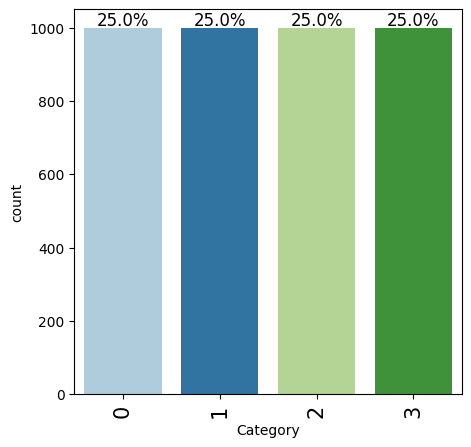

In [10]:
labeled_barplot(data, "Category", perc=True)   ## Code to get the barplot of Category variable

- Data seems uniformly distributed among categories

In [11]:
data0 = data[data['Category'] == 0]

In [12]:
data0.head()

,Article,Category
0,"Sudan Govt rejects call to separate religion, state Sudanese rebel leaders #39; demand that Islam be kept out of government in the war-torn region of Darfur, has been rejected by government negotiators.",0
1,Hassan: #39;Abhorrent act #39; says Blair Western political leaders have united to condemn the kidnappers of charity worker Margaret Hassan after a video surfaced apparently showing a militant firing a pistol into the head of a blindfolded woman wearing an orange jumpsuit.,0
2,"Sharon Says Gaza Evacuation Set for 2005 (AP) AP - Israel's evacuation of the Gaza Strip will begin next summer and will take about 12 weeks, Prime Minister Ariel Sharon said Wednesday, reversing an earlier decision to speed up the pullout.",0
3,"Prince Charles chastised for quot;old fashioned quot; views A minister has launched a scathing attack on heir to the throne Prince Charles, accusing him of being quot;very old fashioned quot; and out of touch in his views on teaching in schools.",0
4,"U.S. Says N.Korea Blast Probably Not Nuclear SEOUL (Reuters) - A huge explosion rocked North Korea last week but U.S. and South Korean officials said on Sunday it was unlikely to have been a nuclear weapons test despite the appearance of a ""peculiar cloud"" over the area.",0


In [13]:
data1 = data[data['Category'] == 1]

In [14]:
data1.head()

,Article,Category
1000,"AUBURN 21, ALABAMA 13 Auburn #39;s Strong Second Half Keeps It in &lt;b&gt;...&lt;/b&gt; For one half Saturday, the controversy over the Bowl Championship Series looked like it might disappear in the dampness of Bryant-Denny Stadium as undefeated Auburn found itself in a fight with archrival Alabama.",1
1001,"Sherman remains confident after Packers #39; flop in Philly They were, in theory, the NFC #39;s second-best team. Now they #39;re not and no one else is, either. The NFC has the Philadelphia Eagles at the top, the San Francisco 49ers at the bottom and everyone else in the middle.",1
1002,"Brazil Tops Spain for Men's Gold in Beach Volleyball ATHENS (Reuters) - Ricardo Santos and Emanuel Rego beat Spain's Javier Bosma and Pablo Herrera 21-16, 21-15 on Wednesday to bag Brazil's first men's Olympic beach volleyball gold medal.",1
1003,"Arizona State 67, No. 11 Georgia 57 Kylan Loney had five 3s among her 23 points, and Arizona State used 24 turnovers by 11th-ranked Georgia to win 67-57 Tuesday night.",1
1004,"Celtics OK with this traveling Gary Payton was back at practice yesterday. His third round trip to California since the start of training camp was, as they say in the trade, an elevator ride. Out on Saturday. Check on the family. Back on Sunday in time for the rap concert at the FleetCenter.",1


In [15]:
data2 = data[data['Category'] == 2]

In [16]:
data2.head()

,Article,Category
2000,Aisin finishes deal for Michigan land HANDY TOWNSHIP -- A Japanese auto supplier said Thursday it completed the purchase of about 750 acres of Michigan land for a proving ground.,2
2001,"Two hurricanes = two deductibles Many homeowners in the Orlando area suffered a double blow when hurricanes Charley and Frances struck in quick succession. Now, they #39;re smarting from a financial one-two punch - two insurance deductibles.",2
2002,"America's Best Airline? Hawaiian Airlines is putting up impressive numbers, including some that really matter to travelers.",2
2003,"AT amp;T Posts \$7.1 Billion Loss for the 3Q AT amp;T Corp. swung to a third-quarter loss of \$7.12 billion after recording huge charges related to the company #39;s retreat from traditional telephone services, which has included at least 7,500 more job cuts",2
2004,Regional Home Price Drop Possible WASHINGTON (Reuters) - U.S. housing industry economists on Monday cautioned that rapid house price gains in some areas of the country may not be sustainable.,2


In [17]:
data3 = data[data['Category'] == 3]

In [18]:
data3.head()

,Article,Category
3000,"When Wireless Networks Merge Now that its \$41 billion takeover of AT T Wireless has been completed, Cingular will spend hundreds of millions of dollars in coming weeks on its advertising campaign.",3
3001,"Microsoft Updates SQL Server 2005 Microsoft today announced the availability of the second Community Technology Preview (CTP) for Microsoft SQL Server 2005 and the technical preview availability of SQL Server 2005 Express Manager, a new, free database management tool.",3
3002,"HP Hugs JBoss Tighter HP (Quote, Chart) deepened its relationship with open source software concern JBoss, agreeing to become a major source of support for its application server and Linux.",3
3003,Music lovers can download entire track on their Mobile Phone Here is good news for music lovers! Now you can download the entire track on your mobile phone. This is made possible as two giants US-based Melodeo and Warner Music Group has signed an agreement whereby consumers,3
3004,Older mobiles may cause tumours: study The Institute of Environmental Medicine (IMM) at Karolinska Institute in Sweden found no indications of risk for less than 10 years of usage.,3


## **Model Building - Sentence Transformer + ML**

### Defining the SentenceTransformer Model

In [19]:
## Defining the model.
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [20]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape[0], cm.shape[1])

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Encoding the data

In [21]:
# setting the compute device
device = "cuda" if torch.cuda.is_available() else "cpu"

## Encoding the dataset.
embedding_matrix = model.encode(data["Article"],show_progress_bar=True,device=device)

Batches:   0%|          | 0/125 [00:00<?, ?it/s]

### Train-Test Split

In [22]:
# Split the data
X = embedding_matrix
y = data["Category"]

In [23]:
# Initial split into training (80%) and testing (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.20, random_state=42)

# Further split the temporary set into validation (10%) and test (10%) sets
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

In [24]:
print("Shape of the set of input variables for training:", X_train.shape)    # Code to get the shape of training input data
print("Shape of the set of input variables for validation:", X_valid.shape)    # Code to get the shape of validation input data
print("Shape of the set of input variables for testing:", X_test.shape)     # Code to get the shape of testing input data

Shape of the set of input variables for training: (3200, 384)
Shape of the set of input variables for validation: (400, 384)
Shape of the set of input variables for testing: (400, 384)


In [25]:
print("Shape of the set of output variables for training:", y_train.shape)    # Code to get the shape of training output data
print("Shape of the set of output variables for validation:", y_valid.shape)    # Code to get the shape of validation output data
print("Shape of the set of output variables for testing:", y_test.shape)     # Code to get the shape of testing output data

Shape of the set of output variables for training: (3200,)
Shape of the set of output variables for validation: (400,)
Shape of the set of output variables for testing: (400,)


### Random Forest Model (base)

In [26]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn

def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred,average="weighted")  # to compute Recall
    precision = precision_score(target, pred,average="weighted")  # to compute Precision
    f1 = f1_score(target, pred,average="weighted")  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [27]:
## Building the base model using RandomForestClassifier
rf = RandomForestClassifier(random_state = 42)

## Code to fit the model on X_train and y_train
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**Confusion Matrix**

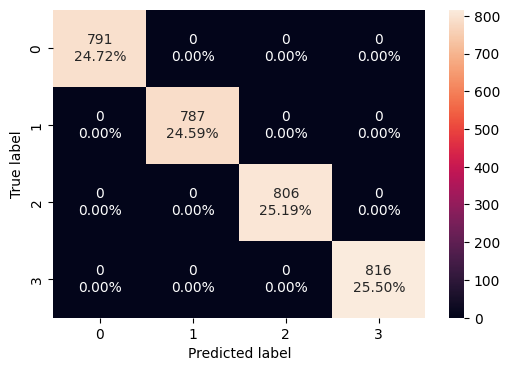

In [28]:
## To get the confusion matrix on X_train and y_train
confusion_matrix_sklearn(rf, X_train, y_train)

- Confusion matrix shows 100% accuracy in predicting content category.

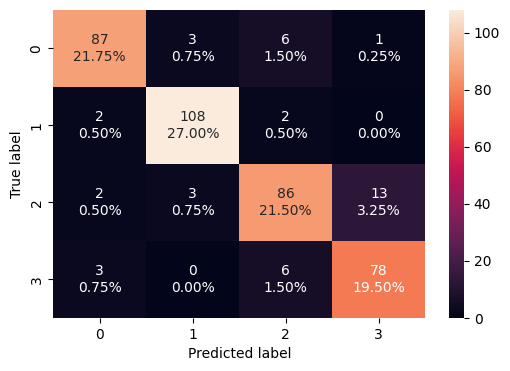

In [29]:
## Code to get the confusion matrix for X_valid and y_valid
confusion_matrix_sklearn(rf, X_valid, y_valid)

- More of Article of type 2 seems miscatgorized in type 3 or 0.
- Overall accuracy seems not bad for article of type 2.

In [30]:
# Predicting on train data
y_pred_train = rf.predict(X_train)

# Predicting on validation data
y_pred_valid = rf.predict(X_valid)

**Classification report**

In [31]:
## Classification report for train data
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       791
           1       1.00      1.00      1.00       787
           2       1.00      1.00      1.00       806
           3       1.00      1.00      1.00       816

    accuracy                           1.00      3200
   macro avg       1.00      1.00      1.00      3200
weighted avg       1.00      1.00      1.00      3200



In [32]:
## Code to get the classification report for validation data
print(classification_report(y_valid, y_pred_valid))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91        97
           1       0.95      0.96      0.96       112
           2       0.86      0.83      0.84       104
           3       0.85      0.90      0.87        87

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400



In [33]:
## Storing the metrics
rf_train_perf = model_performance_classification_sklearn(
    rf, X_train, y_train
)

In [34]:
## Storing the metrics
rf_valid_perf = model_performance_classification_sklearn(
    rf, X_valid, y_valid
)

- Model seems overfitting

### Random Forest (with class_weights)

In [35]:
## Building the model
rf_balanced = RandomForestClassifier(class_weight="balanced", random_state=42)

## Code to fit the model on X_train and y_train
rf_balanced.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

**Confusion Matrix**

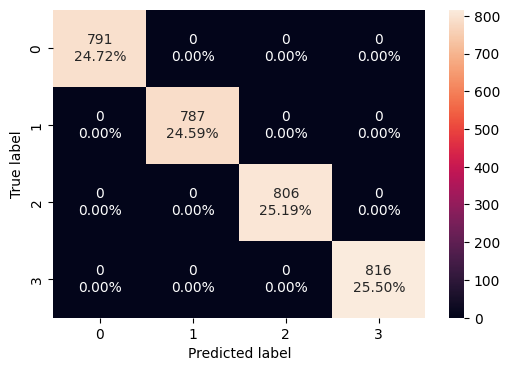

In [36]:
## To get the confusion matrix on X_train and y_train
confusion_matrix_sklearn(rf_balanced, X_train, y_train)

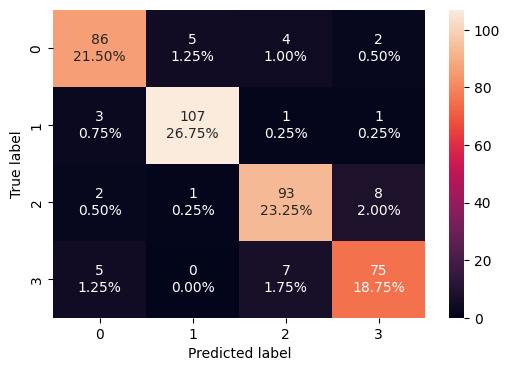

In [37]:
## Code to get the confusion matrix for X_valid and y_valid
confusion_matrix_sklearn(rf_balanced, X_valid, y_valid)

In [38]:
## Predicting on train data
y_pred_train = rf_balanced.predict(X_train)

## Code to predict the model on X_valid
y_pred_valid = rf_balanced.predict(X_valid)

**Classification report**

In [39]:
## Classification report for train data
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       791
           1       1.00      1.00      1.00       787
           2       1.00      1.00      1.00       806
           3       1.00      1.00      1.00       816

    accuracy                           1.00      3200
   macro avg       1.00      1.00      1.00      3200
weighted avg       1.00      1.00      1.00      3200



In [40]:
## Code to get the classification report for validation data
print(classification_report(y_valid, y_pred_valid))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89        97
           1       0.95      0.96      0.95       112
           2       0.89      0.89      0.89       104
           3       0.87      0.86      0.87        87

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400



In [41]:
## Storing the metrics
rf_bal_train_perf = model_performance_classification_sklearn(
    rf_balanced, X_train, y_train
)

In [42]:
## Code to store the metrics of validation data
rf_bal_valid_perf = model_performance_classification_sklearn(
    rf_balanced, X_valid, y_valid
)

- Model seems still overfitting. Using class_weight=balanced  didnt help because data is already balanced.

### Random Forest (with hyperparamter tuning)

In [43]:
%%time
## Building the model
rf_tuned = RandomForestClassifier(class_weight="balanced", random_state=42)

## Defining the hyperparameter grid for tuning
parameters = {
    "max_depth": list(np.arange(4, 10, 3)),
    "max_features": ["sqrt", 0.5, 0.7],
    "min_samples_split": [5, 6],
    "n_estimators": np.arange(30, 110, 15),
}

## Defining the type of scoring used to compare parameter combinations
## We need to specify the mechanism of averaging as we have more than 2 target classes
scorer = make_scorer(recall_score, average='weighted')

## Running the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=3, n_jobs=-1)

## Code to fit the model on X_train and y_train
grid_obj = grid_obj.fit(X_train, y_train)

CPU times: user 6.05 s, sys: 710 ms, total: 6.76 s
Wall time: 5min 56s


In [44]:
## Creating a new model with the best combination of parameters
rf_tuned = grid_obj.best_estimator_

## Complte the code to fit the new model to X_train and y_train
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=7,
                       min_samples_split=6, n_estimators=105, random_state=42)

Best estimator suggested params: max_depth=7, min_samples_split=6 and n_estimators=105

**Confusion Matrix**

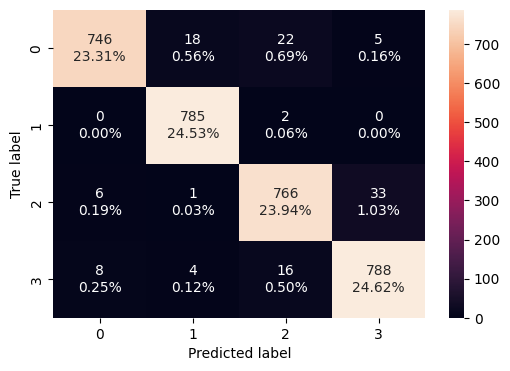

In [45]:
## To get the confusion matrix on X_train and y_train
confusion_matrix_sklearn(rf_tuned, X_train, y_train)

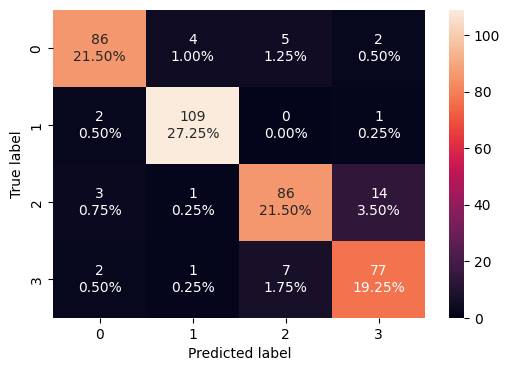

In [46]:
## Code to get the confusion matrix for X_valid and y_valid
confusion_matrix_sklearn(rf_tuned, X_valid, y_valid)

In [47]:
## Code to predict the model on train data
y_pred_train = rf_tuned.predict(X_train)

## Code to predict the model on validation data
y_pred_valid = rf_tuned.predict(X_valid)

**Classification report**

In [48]:
## Code to get the classification report for train data
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       791
           1       0.97      1.00      0.98       787
           2       0.95      0.95      0.95       806
           3       0.95      0.97      0.96       816

    accuracy                           0.96      3200
   macro avg       0.96      0.96      0.96      3200
weighted avg       0.96      0.96      0.96      3200



In [49]:
## Code to get the classification report for validation data
print(classification_report(y_valid, y_pred_valid))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91        97
           1       0.95      0.97      0.96       112
           2       0.88      0.83      0.85       104
           3       0.82      0.89      0.85        87

    accuracy                           0.90       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.90      0.89       400



In [50]:
## Code to store the metrics of train data
rf_tuned_train_perf = model_performance_classification_sklearn(
    rf_tuned, X_train, y_train
)

In [51]:
## Code to store the metrics of validation data
rf_tuned_valid_perf = model_performance_classification_sklearn(
    rf_tuned, X_valid, y_valid
)

- Model seems generized. It gave 96% accuracy score on train data and 90% score on validation dataset.

## **Model Building - Transformer**

### Target Mapping

In [52]:
class_map = {0:"World",1:"Sports",2:"Business",3:"Sci/Tech"}

In [53]:
class_map

{0: 'World', 1: 'Sports', 2: 'Business', 3: 'Sci/Tech'}

In [54]:
reverse_class_map = {}
for key,value in class_map.items():
    reverse_class_map[value]=key

reverse_class_map

{'World': 0, 'Sports': 1, 'Business': 2, 'Sci/Tech': 3}

### Defining the Tokenizer

In [55]:
## Initializing a T5 tokenizer using the pre-trained model
tokenizer = T5Tokenizer.from_pretrained("google/flan-t5-large")

tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


### Defining the Transformer Pre-Trained Model

In [56]:
## Initializing a T5 model for conditional generation using the pre-trained model "google/flan-t5-large"

# uncomment and use the following line in case GPU is not available
# model = T5ForConditionalGeneration.from_pretrained("google/flan-t5-large", device_map="auto")

# uncomment and use the following line in case GPU is available
model = T5ForConditionalGeneration.from_pretrained("google/flan-t5-large", device_map="auto", load_in_8bit=True)

config.json:   0%|          | 0.00/662 [00:00<?, ?B/s]

The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.


model.safetensors:   0%|          | 0.00/3.13G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

### Functions for making predictions

In [57]:
## Defining a function to compute different metrics.

def model_performance_classification(pred, target):
    """
    Function to compute different metrics to check classification model performance

    pred : prediction of the target variable.
    target: dependent variable
    """


    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred,average="weighted")  # to compute Recall
    precision = precision_score(target, pred,average="weighted")  # to compute Precision
    f1 = f1_score(target, pred,average="weighted")  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [58]:
## Creating a function to plot the confusion matrix
def plot_confusion_matrix(actual, predicted):
    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (5, 4))
    label_list = ['World','Sports','Business','Sci/Tech']
    sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = label_list, yticklabels = label_list)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [59]:
# defining a function to generate, process, and return a response
def generate_response(prompt):
    # uncomment and use the following line in case GPU is not available
    # input_ids = tokenizer(prompt, return_tensors="pt").input_ids    ### using the tokenizer to create tokens in tensor format from an input

    # uncomment and use the following line in case GPU is available
    input_ids = tokenizer(prompt, return_tensors="pt", max_length=512, truncation=True).input_ids.to("cuda")    ### using the tokenizer to create tokens in tensor format from an input

    # Tokenize the input and truncate to 512 tokens
    # input_ids = tokenizer(prompt, return_tensors="pt", max_length=512, truncation=True).input_ids


    outputs = model.generate(input_ids, max_length=16, do_sample=True, temperature=0.001)    ### generating the model output in tensor format
    return tokenizer.decode(outputs[0])[6:-4]    ### using the tokenizer to decode the model output, and then return it

### Base Prompt for Prediction

In [60]:
## Selecting and assigning specific columns
X_train = data.iloc[y_train.index]["Article"]
X_valid = data.iloc[y_test.index]["Article"]
X_test = data.loc[y_valid.index]["Article"]

In [61]:
## Defining a prompt which tells the model what to do
sys_prompt = """
    Please categorize the following news article:
"""

## Predicting the category using the model by incorporating the system prompt and the provided review text

pred_sent = generate_response(
    """
        {}
        news article: '{}'
    """.format(sys_prompt, X_train[4])
)

print(pred_sent)

World


In [62]:
X_train[4]

'U.S. Says N.Korea Blast Probably Not Nuclear  SEOUL (Reuters) - A huge explosion rocked North Korea last  week but U.S. and South Korean officials said on Sunday it was  unlikely to have been a nuclear weapons test despite the  appearance of a "peculiar cloud" over the area.'

In [63]:
## Defining a function to generate a sentiment prediction
def predict_category(news_article):
    pred = generate_response(
        """
            {}
            news article: '{}'
        """.format(sys_prompt,news_article)
    )

    if "Sports" in pred:
       pred="Sports"
    elif "Business" in pred:
       pred="Business"
    elif "World" in pred:
       pred="World"
    else:
      pred="Sci/Tech"

    return reverse_class_map[pred]

In [64]:
%%time
## Applying predict_category function on the train data
y_pred_train_flan = X_train.apply(predict_category)

CPU times: user 27min 31s, sys: 2.92 s, total: 27min 34s
Wall time: 27min 31s


In [65]:
%%time
## Applying predict_category function on the validation data
y_pred_valid_flan = X_valid.apply(predict_category)

CPU times: user 3min 22s, sys: 330 ms, total: 3min 22s
Wall time: 3min 22s


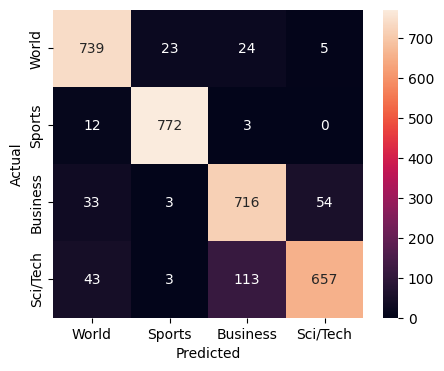

In [66]:
## Plotting the confusion matrix
plot_confusion_matrix(y_train, y_pred_train_flan)

- Model seems to be struggling to differentiate between Science/Tech and Business. 113 Sci/Tech articles are miscategorized as Business.

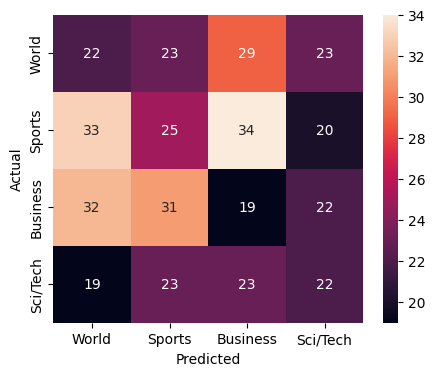

In [67]:
## Code to get the confusion matrix for validation data
plot_confusion_matrix(y_valid, y_pred_valid_flan)

In [68]:
## Getting the classification report for train data
print(classification_report(y_train, y_pred_train_flan))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       791
           1       0.96      0.98      0.97       787
           2       0.84      0.89      0.86       806
           3       0.92      0.81      0.86       816

    accuracy                           0.90      3200
   macro avg       0.90      0.90      0.90      3200
weighted avg       0.90      0.90      0.90      3200



In [69]:
## Code to get the classification report for validation data
print(classification_report(y_valid, y_pred_valid_flan))

              precision    recall  f1-score   support

           0       0.21      0.23      0.22        97
           1       0.25      0.22      0.23       112
           2       0.18      0.18      0.18       104
           3       0.25      0.25      0.25        87

    accuracy                           0.22       400
   macro avg       0.22      0.22      0.22       400
weighted avg       0.22      0.22      0.22       400



In [70]:
## Storing the metrics
flan_train_base = model_performance_classification(y_pred_train_flan,y_train)
flan_valid_base = model_performance_classification(y_pred_valid_flan,y_valid)

- Model performed well on training data but gave poor result on validation data.

### Improved Prompt for Prediction

In [71]:
# defining a prompt which tells the model what to do

sys_prompt = """
    You are an advanced AI language model specialized in news article categorization. Your task is to analyze the content of the given news article and classify it into one of the predefined categories.

    Instructions:
    1. Read the entire article carefully.
    2. Determine the main topic or focus of the article.
    3. Classify the article as one of the following categories based on main topic or focus:
       - World
       - Business
       - Sports
       - Sci/Tech

    Examples:
    Article: "Prince Charles chastised for quot;old fashioned quot; views A minister has launched a scathing attack on heir to the throne Prince Charles, accusing him of being quot;very old fashioned quot; and out of touch in his views on teaching in schools"
    Predicted category: World

    Article: "Arizona State 67, No. 11 Georgia 57 Kylan Loney had five 3s among her 23 points, and Arizona State used 24 turnovers by 11th-ranked Georgia to win 67-57 Tuesday night"
    Predicted category: Sports

    Article: "Regional Home Price Drop Possible WASHINGTON (Reuters) - U.S. housing industry economists on Monday cautioned that rapid house price gains in some areas of the country may not be sustainable"
    Predicted category: Business

    Article: "Older mobiles may cause tumours: study The Institute of Environmental Medicine (IMM) at Karolinska Institute in Sweden found no indications of risk for less than 10 years of usage."
    Predicted category: Sci/Tech

    Now, carefully read the text of the article and consider the overall sentiment of the content while assigning the category
"""


# predicting the sentiment using the model by incorporating the system prompt and the provided review text

pred_sent = generate_response(
    """
        {}
        news article: '{}'
    """.format(sys_prompt, X_train[4])
)

print(pred_sent)

Predicted category: World


In [72]:
%%time
## Applying predict_category function on the train data
y_pred_train_flan_imp = X_train.apply(predict_category)

CPU times: user 43min 58s, sys: 2.48 s, total: 44min 1s
Wall time: 43min 57s


In [73]:
%%time
## Applying predict_category function on the validation data
y_pred_valid_flan_imp = X_valid.apply(predict_category)

CPU times: user 5min 26s, sys: 272 ms, total: 5min 26s
Wall time: 5min 26s


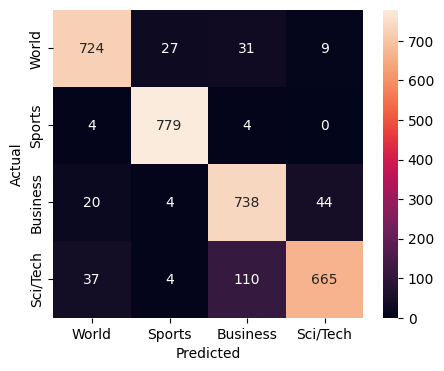

In [74]:
## Plotting the confusion matrix for train data
plot_confusion_matrix(y_train, y_pred_train_flan_imp)

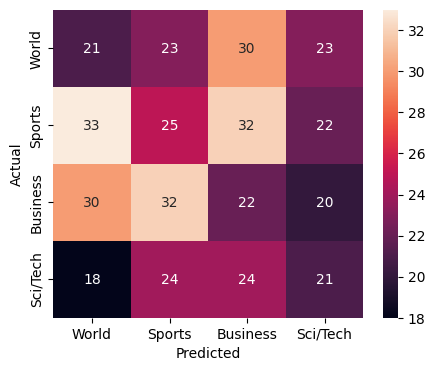

In [75]:
## Codet to get the confusion matrix for validation data
plot_confusion_matrix(y_valid, y_pred_valid_flan_imp)

In [76]:
## Getting the classification report for train data
print(classification_report(y_train, y_pred_train_flan_imp))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       791
           1       0.96      0.99      0.97       787
           2       0.84      0.92      0.87       806
           3       0.93      0.81      0.87       816

    accuracy                           0.91      3200
   macro avg       0.91      0.91      0.91      3200
weighted avg       0.91      0.91      0.91      3200



In [77]:
## Code to get the classification report for validation data
print(classification_report(y_valid, y_pred_valid_flan_imp))

              precision    recall  f1-score   support

           0       0.21      0.22      0.21        97
           1       0.24      0.22      0.23       112
           2       0.20      0.21      0.21       104
           3       0.24      0.24      0.24        87

    accuracy                           0.22       400
   macro avg       0.22      0.22      0.22       400
weighted avg       0.22      0.22      0.22       400



In [78]:
## Storing the metrics
flan_train_imp = model_performance_classification(y_pred_train_flan_imp,y_train)
flan_valid_imp = model_performance_classification(y_pred_valid_flan_imp,y_valid)

## **Model Performance Comparison and Final Model Selection**

In [79]:
## Training performance comparison

models_train_comp_df = pd.concat(
    [
        rf_train_perf.T,
        rf_bal_train_perf.T,
        rf_tuned_train_perf.T,
        flan_train_base.T,
        flan_train_imp.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Random Forest(base)",
    "Random Forest with class_weights",
    "Random Forest(tuned)",
    "Flan (base prompt)",
    "Flan (improvised prompt)"
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Random Forest(base),Random Forest with class_weights,Random Forest(tuned),Flan (base prompt),Flan (improvised prompt)
Accuracy,1.0,1.0,0.964063,0.901250,0.908125
Recall,1.0,1.0,0.964063,0.901250,0.908125
Precision,1.0,1.0,0.964215,0.902586,0.910033
F1,1.0,1.0,0.963992,0.900655,0.907643


In [80]:
## Validation set performance comparison
models_valid_comp_df = pd.concat(
    [
        rf_valid_perf.T,
        rf_bal_valid_perf.T,
        rf_tuned_valid_perf.T,
        flan_valid_base.T,
        flan_valid_imp.T
    ],
    axis=1,
)
models_valid_comp_df.columns = [
    "Random Forest(base)",
    "Random Forest with class_weights",
    "Random Forest(tuned)",
    "Flan (base prompt)",
    "Flan (improvised prompt)"
]
print("Validation set performance comparison:")
models_valid_comp_df

Validation set performance comparison:


,Random Forest(base),Random Forest with class_weights,Random Forest(tuned),Flan (base prompt),Flan (improvised prompt)
Accuracy,0.897500,0.902500,0.895000,0.220000,0.222500
Recall,0.897500,0.902500,0.895000,0.220000,0.222500
Precision,0.897707,0.902338,0.895967,0.221005,0.223308
F1,0.897296,0.902396,0.894866,0.220255,0.222761


**Pick the best model from the above table and apply on test data**
- Random Forest with class_weights gave the best result out of all. So let's run on test data.

In [81]:
## Assigns test rows based on index
X_test = embedding_matrix[y_test.index]

None


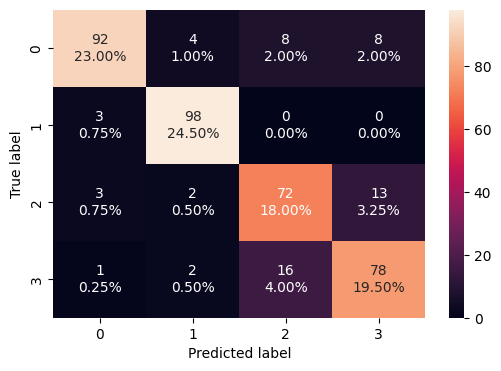

In [82]:
print(confusion_matrix_sklearn(rf_balanced, X_test, y_test))

In [83]:
# Predicting on test data
y_pred_test = rf_balanced.predict(X_test)

In [84]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.93      0.82      0.87       112
           1       0.92      0.97      0.95       101
           2       0.75      0.80      0.77        90
           3       0.79      0.80      0.80        97

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400



## **Actionable Insights and Recommendations**
- Dataset contains 4000 articles which has 4 different types of content.
- Most of RandomForest model performed well and gave accuracy of 89% and 85% on validation and test data.
- Transformer model didnt perform well on testing data. It needs further investigation.
- Recommend to spend extra time to develop more simple, specific and precise prompts for Transformer model. Need to give priority to category predict if the content has more than one type of category content.
- We need more data to train the model since some of the article has mixed content.

-----------------------------------------------------------------------------



Appendix: To convert ipynb in to HTML file

In [85]:
# import locale
# locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')


'en_US.UTF-8'

In [86]:
# !pip install nbconvert  # Install nbconvert library to create html file

In [87]:
# !jupyter nbconvert --to html '/content/drive/MyDrive/GL/NLP_Article_Categorization_Notebook.ipynb'

In [ ]:
# # Set the locale to UTF-8
# import locale
# locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

# # Upload ipynb
# from google.colab import files
# uploaded = files.upload()

# # Convert ipynb to html
# import subprocess
# import os

# # Get the filename of the uploaded file
# file_name = list(uploaded.keys())[0]

# # Install nbconvert if not already installed
# subprocess.run(["pip", "install", "nbconvert"])

# # Convert the notebook to HTML
# subprocess.run(["jupyter", "nbconvert", file_name, "--to", "html"])

# # Define the expected HTML file name
# html_file_name = file_name.replace(".ipynb", ".html")

# # Check if the HTML file exists
# if os.path.exists(html_file_name):
#     # Download the HTML file
#     files.download(html_file_name)
# else:
#     print(f"File {html_file_name} not found.")




---

